In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0, n_repeated=0, 
                           n_informative=2, n_clusters_per_class=2, 
                           random_state=42) #for reproducibility 

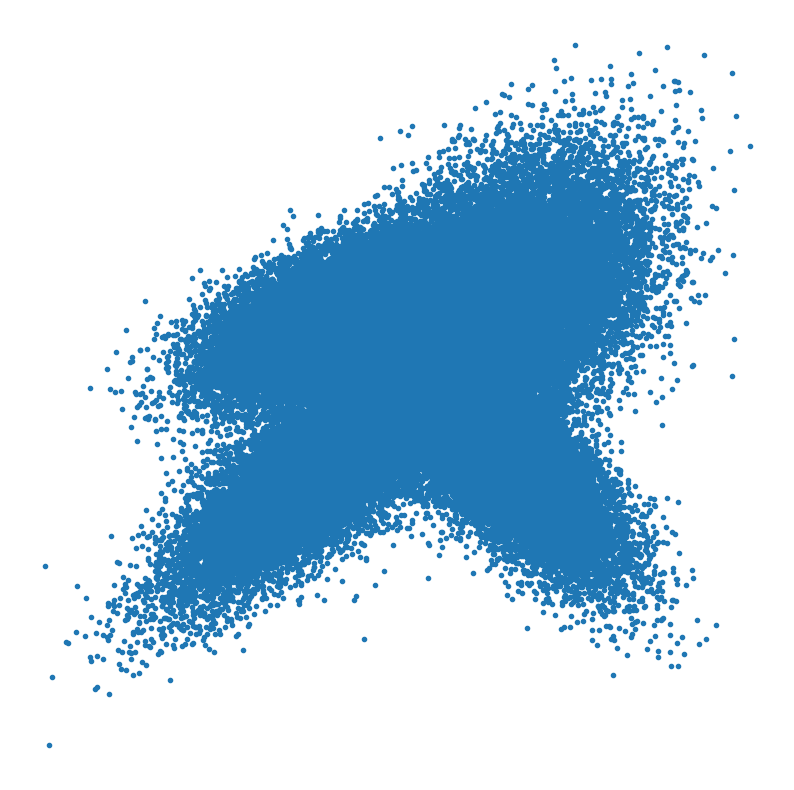

In [2]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10)
plt.scatter(X[:,0], X[:,1], marker='.')
plt.axis('off')
plt.show()

In [3]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr == None:
        distances = [dist(v,p) for v in X]
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist(v,xr) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi]+dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean([dist(x,cen) for x in c], axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

In [4]:
# Vanilla MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
#plot_results(clusters)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

  0%|                                                                             | 5/100000 [00:00<1:59:56, 13.90it/s]

  0%|                                                                            | 10/100000 [00:00<1:22:41, 20.15it/s]

  0%|                                                                            | 15/100000 [00:00<1:36:45, 17.22it/s]

  0%|                                                                            | 20/100000 [00:01<1:21:38, 20.41it/s]

  0%|                                                                            | 25/100000 [00:01<1:32:04, 18.10it/s]

  0%|                                                                            | 30/100000 [00:01<1:19:47, 20.88it/s]

  0%|                                                                            | 35/100000 [00:01<1:30:12, 18.47it/s]

  0%|                                                                            | 40/100000 [00:02<1:19:22, 20.99it/s]

  0%|                                                                            | 45/100000 [00:02<1:31:15, 18.25it/s]

  0%|                                                                            | 50/100000 [00:02<1:20:16, 20.75it/s]

  0%|                                                                            | 55/100000 [00:02<1:30:01, 18.50it/s]

  0%|                                                                            | 60/100000 [00:03<1:19:31, 20.95it/s]

  0%|                                                                            | 65/100000 [00:03<1:29:32, 18.60it/s]

  0%|                                                                            | 70/100000 [00:03<1:19:06, 21.05it/s]

  0%|                                                                            | 75/100000 [00:03<1:28:39, 18.78it/s]

  0%|                                                                            | 80/100000 [00:04<1:18:13, 21.29it/s]

  0%|                                                                            | 85/100000 [00:04<1:27:37, 19.00it/s]

  0%|                                                                            | 90/100000 [00:04<1:17:40, 21.44it/s]

  0%|                                                                            | 95/100000 [00:04<1:27:22, 19.06it/s]

  0%|                                                                           | 100/100000 [00:05<1:17:29, 21.48it/s]

  0%|                                                                           | 105/100000 [00:05<1:27:29, 19.03it/s]

  0%|                                                                           | 110/100000 [00:05<1:17:26, 21.50it/s]

  0%|                                                                           | 115/100000 [00:05<1:28:30, 18.81it/s]

  0%|                                                                           | 120/100000 [00:06<1:19:11, 21.02it/s]

  0%|                                                                           | 125/100000 [00:06<2:12:16, 12.59it/s]

  0%|                                                                           | 130/100000 [00:07<2:19:39, 11.92it/s]

  0%|                                                                           | 135/100000 [00:08<3:12:03,  8.67it/s]

  0%|                                                                           | 140/100000 [00:08<3:01:45,  9.16it/s]

  0%|                                                                           | 145/100000 [00:09<3:41:43,  7.51it/s]

  0%|                                                                           | 150/100000 [00:10<3:22:18,  8.23it/s]

  0%|                                                                           | 155/100000 [00:11<3:56:29,  7.04it/s]

  0%|                                                                           | 160/100000 [00:11<3:33:06,  7.81it/s]

  0%|                                                                           | 165/100000 [00:12<4:04:22,  6.81it/s]

  0%|▏                                                                          | 170/100000 [00:12<3:38:08,  7.63it/s]

  0%|▏                                                                          | 175/100000 [00:13<4:09:02,  6.68it/s]

  0%|▏                                                                          | 180/100000 [00:14<3:41:13,  7.52it/s]

  0%|▏                                                                          | 185/100000 [00:15<4:10:10,  6.65it/s]

  0%|▏                                                                          | 190/100000 [00:15<3:42:01,  7.49it/s]

  0%|▏                                                                          | 195/100000 [00:16<4:11:00,  6.63it/s]

  0%|▏                                                                          | 200/100000 [00:17<3:43:27,  7.44it/s]

  0%|▏                                                                          | 205/100000 [00:18<4:12:02,  6.60it/s]

  0%|▏                                                                          | 210/100000 [00:18<3:43:18,  7.45it/s]

  0%|▏                                                                          | 215/100000 [00:19<4:10:32,  6.64it/s]

  0%|▏                                                                          | 220/100000 [00:20<3:42:56,  7.46it/s]

  0%|▏                                                                          | 225/100000 [00:21<4:10:04,  6.65it/s]

  0%|▏                                                                          | 230/100000 [00:21<3:42:09,  7.48it/s]

  0%|▏                                                                          | 235/100000 [00:22<4:09:31,  6.66it/s]

  0%|▏                                                                          | 240/100000 [00:22<3:41:29,  7.51it/s]

  0%|▏                                                                          | 245/100000 [00:23<4:09:07,  6.67it/s]

  0%|▏                                                                          | 250/100000 [00:24<3:41:27,  7.51it/s]

  0%|▏                                                                          | 255/100000 [00:25<4:10:24,  6.64it/s]

  0%|▏                                                                          | 260/100000 [00:25<3:43:08,  7.45it/s]

  0%|▏                                                                          | 265/100000 [00:26<4:12:02,  6.60it/s]

  0%|▏                                                                          | 270/100000 [00:27<3:43:38,  7.43it/s]

  0%|▏                                                                          | 275/100000 [00:28<4:11:10,  6.62it/s]

  0%|▏                                                                          | 280/100000 [00:28<3:42:46,  7.46it/s]

  0%|▏                                                                          | 285/100000 [00:29<4:12:21,  6.59it/s]

KeyboardInterrupt: 

# ALTERNATIVE IMPLEMENTATION

Substituting list comprehensions by NumPy automatic operand broadcast.

In [ ]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y, axis=1)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr is None:
        distances = dist(p,X)
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = dist(xr,D)
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = np.append(dist_to_xr[:xsi], dist_to_xr[xsi+1:], axis=0)
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean(dist(cen,c), axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

In [ ]:
# Vectorized MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
plot_results(clusters)

# STOP HERE

In [ ]:
k = 10000
c, cen = mdav(X, len(X) // 2)
c0, cen0 = mdav(c[0], k)
c1, cen1 = mdav(c[1], k)
clusters = np.vstack((c0,c1))
centroids = np.vstack((cen0,cen1))

print_stats(clusters, centroids)
plot_results(clusters)

In [ ]:
k = 10000
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, cen00 = mdav(c0[0], k)
c01, cen01 = mdav(c0[1], k)
c10, cen10 = mdav(c1[0], k)
c11, cen11 = mdav(c1[1], k)

clusters = np.vstack((c00,c01,c10,c11))
centroids = np.vstack((cen00,cen01,cen10,cen11))

print_stats(clusters, centroids)
plot_results(clusters)

In [ ]:
k = 5
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, _ = mdav(c0[0], len(c0[0]) // 2)
c01, _ = mdav(c0[1], len(c0[1]) // 2)
c10, _ = mdav(c1[0], len(c1[0]) // 2)
c11, _ = mdav(c1[1], len(c1[1]) // 2)

c000, cen000 = mdav(c00[0], k)
c001, cen001 = mdav(c00[1], k)
c010, cen010 = mdav(c01[0], k)
c011, cen011 = mdav(c01[1], k)
c100, cen100 = mdav(c10[0], k)
c101, cen101 = mdav(c10[1], k)
c110, cen110 = mdav(c11[0], k)
c111, cen111 = mdav(c11[1], k)

clusters = np.vstack(
    (
        c000,
        c001,
        c010,
        c011,
        c100,
        c101,
        c110,
        c111
    )
)

centroids = np.vstack(
    (
        cen000,
        cen001,
        cen010,
        cen011,
        cen100,
        cen101,
        cen110,
        cen111
    )
)

print_stats(clusters, centroids)
#plot_results(clusters)